# TP: Machine Learning

## TP2: Classification (4h)

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations

This TP has different **checkpoints**. Please call your teacher at the end of each checkpoint to validate your work. Any non validated work won't be taken into account in the notation


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

If you are using jupyter-notebook, execute the following cell :

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

from google.colab import files
files.upload()  # une boîte de dialogue s'ouvrira

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data (1).csv
<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths      

<ipython-input-8-ff0f789bf77a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

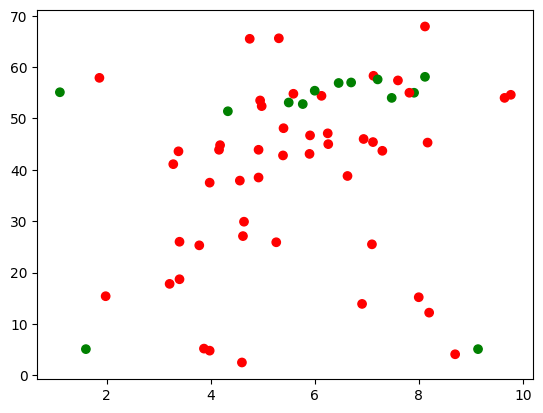

In [8]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

Why was the label status binarized?


To convert the categorical values into numbers (0 and 1), which is required for most machine learning models to process the data.

Is this feature space easily separable? Justify your response.


No, the classes overlap significantly in the plot. There’s no clear boundary between developed and developing countries using only Total_expenditure and BMI.



**TO CODE 1.2**

Plot Total expenditure against Schooling

<ipython-input-9-c8e783a9ed42>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_y = df_Status.replace(['Developing', 'Developed'], [0, 1])


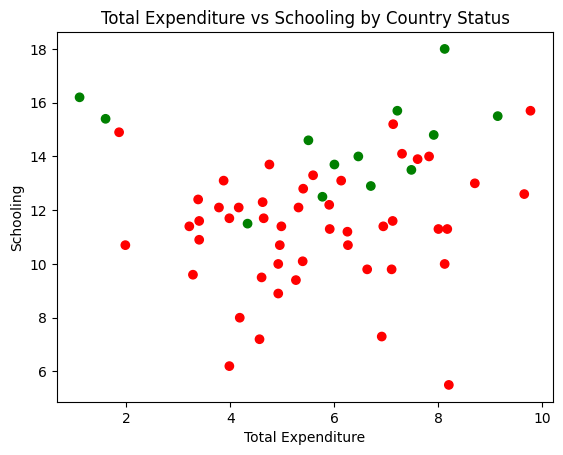

In [9]:
df_X = df1[['Total_expenditure', 'Schooling']]
df_Status = df1[['Status']]
df_y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()

plt.scatter(
    np1[:, 0],  # Total_expenditure (X-axis)
    np1[:, 1],  # Schooling (Y-axis)
    c=np.squeeze(df_y.to_numpy()),  # color by class
    cmap=matplotlib.colors.ListedColormap(['red', 'green'])
)
plt.xlabel('Total Expenditure')
plt.ylabel('Schooling')
plt.title('Total Expenditure vs Schooling by Country Status')
plt.show()


**TO CODE 1.3**

Plot Life Expectancy against Schooling

<ipython-input-11-6d8397adfb14>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_y = df_Status.replace(['Developing', 'Developed'], [0, 1])


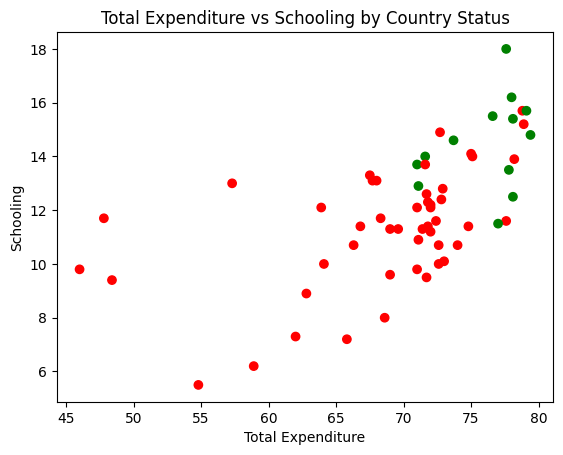

In [11]:
df_X = df1[['Life_expectancy', 'Schooling']]
df_Status = df1[['Status']]
df_y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()

plt.scatter(
    np1[:, 0],  # Total_expenditure (X-axis)
    np1[:, 1],  # Schooling (Y-axis)
    c=np.squeeze(df_y.to_numpy()),  # color by class
    cmap=matplotlib.colors.ListedColormap(['red', 'green'])
)
plt.xlabel('Total Expenditure')
plt.ylabel('Schooling')
plt.title('Total Expenditure vs Schooling by Country Status')
plt.show()


**QUESTION 2**

What would be the best features to use? Justify your response

Use those features as df_X.

Based on the scatter plots, the best features appear to be Schooling and Life_expectancy. These variables show a clearer separation between developed and developing countries, with developed countries tending to have both higher life expectancy and more years of schooling. The classes are still not perfectly separable, but better clustered compared to other feature pairs like BMI or Total_expenditure.

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()
df_X_norm = scaler.fit_transform(df_X)

pd.DataFrame(df_X_norm, columns=df_X.columns).head()


,Life_expectancy,Schooling
0,0.263473,0.000
1,0.796407,0.416
2,0.778443,0.456
3,0.961078,0.792
4,0.658683,0.608


**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(61, 2)


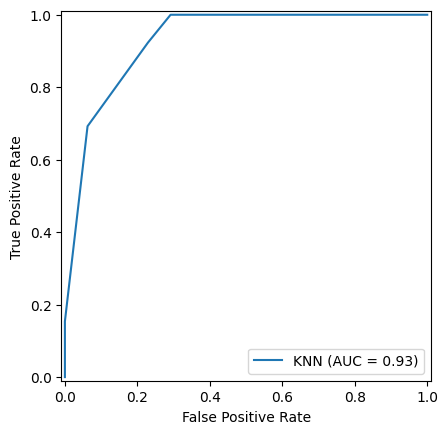

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(df_X_norm, df_Y)

df_Y_pred = clf1.predict_proba(df_X_norm)
print(df_Y_pred.shape)

fpr, tpr, thresholds = metrics.roc_curve(df_Y, df_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='KNN')
display.plot()
plt.show()

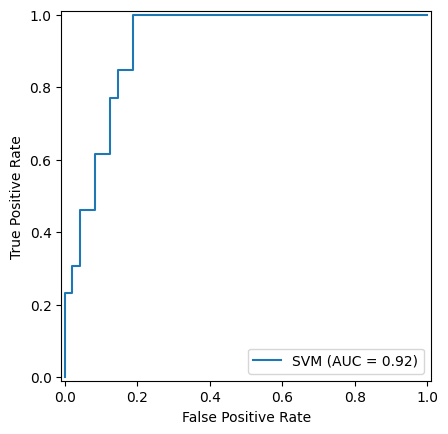

In [18]:
from sklearn.svm import SVC
from sklearn import metrics

clf2 = SVC(C=2.0, kernel='linear', probability=True)
clf2.fit(df_X_norm, df_y.values.ravel())

df_Y_pred = clf2.predict_proba(df_X_norm)
fpr, tpr, thresholds = metrics.roc_curve(df_y, df_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
display.plot()
plt.show()


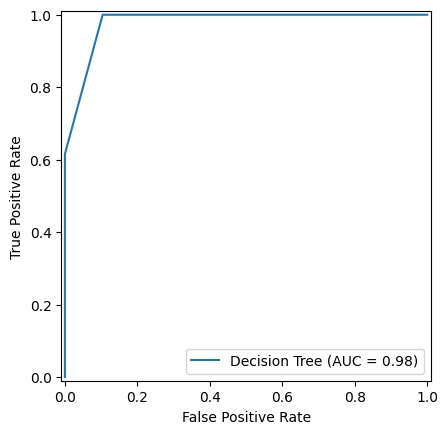

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(df_X_norm, df_y.values.ravel())

df_Y_pred = clf3.predict_proba(df_X_norm)
fpr, tpr, thresholds = metrics.roc_curve(df_y, df_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.show()


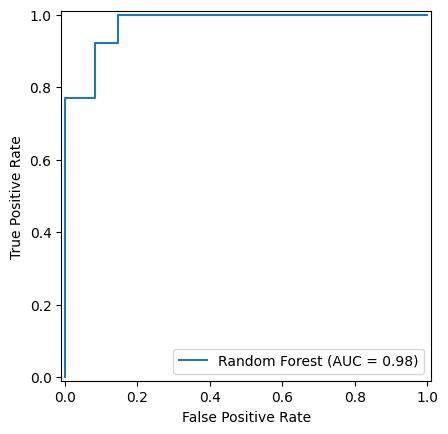

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(df_X_norm, df_y.values.ravel())

df_Y_pred = clf4.predict_proba(df_X_norm)
fpr, tpr, thresholds = metrics.roc_curve(df_y, df_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.show()


**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC.

### **QUESTION 3 – Réponse**

#### **1. Classifiers and Parameters**

We used the following classifiers:

- **K-Nearest Neighbors (KNN)**: `n_neighbors=5`
- **Support Vector Machine (SVM)**: `C=2.0`, `kernel='linear'`, `probability=True`
- **Decision Tree**: `max_depth=3`
- **Random Forest**: `n_estimators=100`, `max_depth=3`

---

#### **2. ROC Curve and AUC**

The **ROC curve** shows the trade-off between the **True Positive Rate (sensitivity)** and the **False Positive Rate (1 - specificity)** at various threshold levels.

The **AUC (Area Under the Curve)** summarizes this performance:  
- AUC close to **1** = excellent model  
- AUC around **0.5** = random guessing

**Results:**

| Classifier      | AUC     |
|-----------------|---------|
| KNN             | 0.93    |
| SVM             | 0.92    |
| Decision Tree   | 0.98    |
| Random Forest   | 0.98    |

---

#### **3. Sensitivity vs. Specificity**

- To **maximize sensitivity** (detect positives):  
  → **Decision Tree** and **Random Forest** are the best (high TPR early in the curve).

- To **maximize specificity** (avoid false positives):  
  → **SVM** or **KNN** are better (low FPR at the start).

---

#### **4. Conclusion**

- **Best overall classifiers**: Decision Tree and Random Forest (AUC = 0.98)  
- **Best for sensitivity**: Decision Tree or Random Forest  
- **Best for specificity**: SVM or KNN

The choice of model depends on the specific goal (sensitivity vs. specificity).


For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

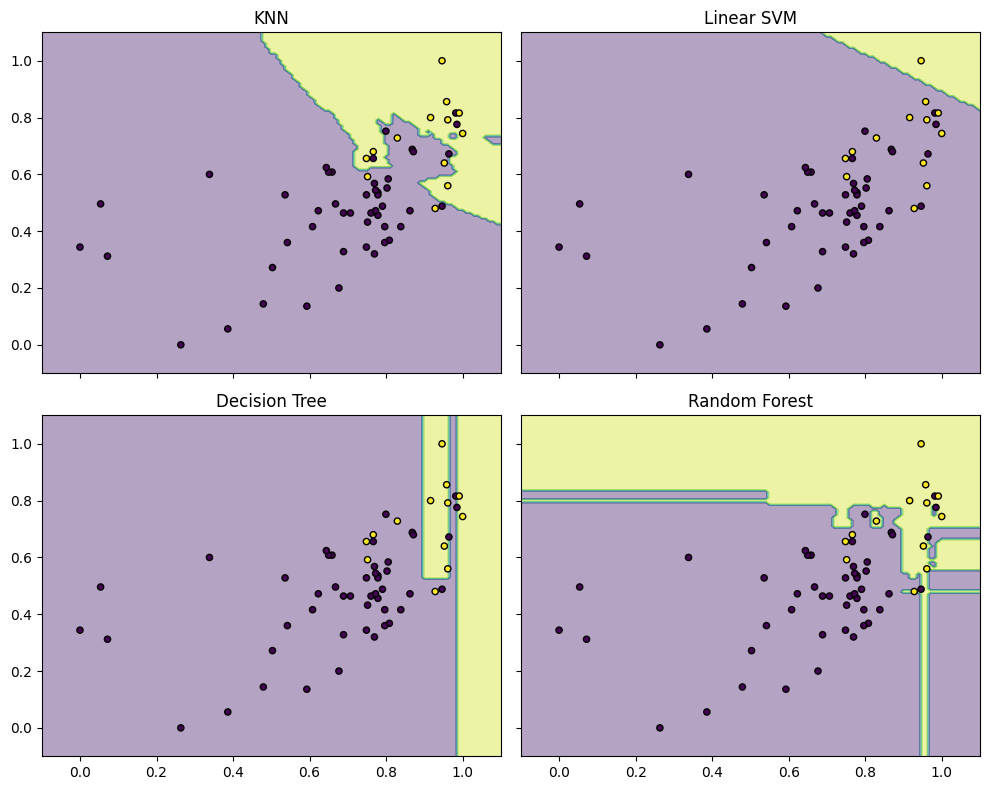

In [25]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = df_X_norm[:, 0].min() - 0.1, df_X_norm[:, 0].max() + 0.1
y_min, y_max = df_X_norm[:, 1].min() - 0.1, df_X_norm[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], repeat=2),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(df_X_norm[:, 0], df_X_norm[:, 1],
                                  c=df_y.values.ravel(), s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.tight_layout()
plt.show()


**QUESTION 4**

What is the main problem of the classification step with this dataset?

In your opinion, which classifier is better suited for this classification task? Justify your response

### **QUESTION 4 – Réponse**

#### **What is the main problem of the classification step with this dataset?**

The main problem is that the dataset is **not linearly separable** and the two classes are **highly overlapping**.  
There is **no clear boundary** that perfectly separates developed and developing countries based on the selected features (`Total Expenditure` and `Schooling`).  
This makes it hard for simple models (like linear SVM) to perform well, and increases the risk of **overfitting** for complex models (like Decision Tree or Random Forest) when trying to fit every point.

---

#### **Which classifier is better suited for this task? Justify your response**

In my opinion, the **Random Forest** is better suited for this task.

- It handles **non-linear patterns** well, as shown by its more flexible decision boundaries.
- Its AUC score is high (0.98), indicating strong classification performance.
- It generalizes better than a single decision tree and avoids overfitting by combining multiple trees.

Even though the Decision Tree also achieves a high AUC, its boundaries are too sharp and likely **overfit** the training data.

---

### **Conclusion**

The Random Forest strikes a good balance between flexibility and generalization.  
However, feature selection and more representative data could still improve the overall classification quality.



## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class in df_Y.

In [27]:
counts = df_y.value_counts(normalize=True)

# Afficher le pourcentage de la classe "Developed" (classe 1)
developed_percentage = counts[1] * 100
print(f"Percentage of 'Developed' class : {developed_percentage:.2f}%")


Percentage of 'Developed' class : 21.31%


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

### **QUESTION 5 – Réponse**

After computing the class distribution, we found that:

- **Developed countries (class 1)** represent **21.31%** of the dataset  
- **Developing countries (class 0)** represent the remaining **78.69%**

This shows a strong **class imbalance**.

To correct for this, we can apply **class weights** that penalize the model more for misclassifying the minority class.

Manually, the weights would be approximately:
- Class 0 (Developing): 1 / 0.7869 ≈ **1.27**
- Class 1 (Developed): 1 / 0.2131 ≈ **4.69**

Or automatically, we can set:

```python
class_weight = "balanced"


**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

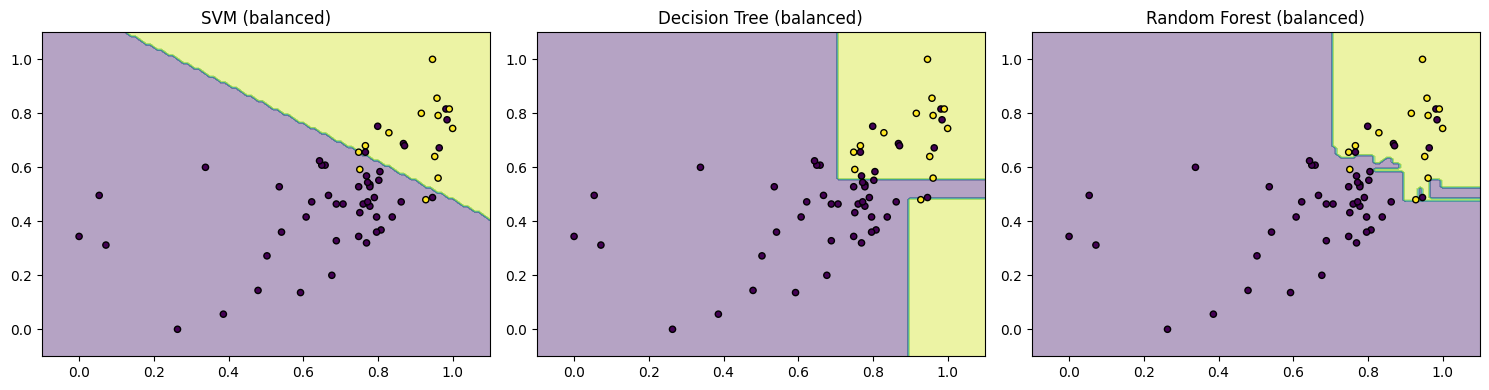

In [28]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Balanced models
clf2_bal = SVC(C=2.0, kernel='linear', probability=True, class_weight='balanced')
clf3_bal = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf4_bal = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')

clf2_bal.fit(df_X_norm, df_y.values.ravel())
clf3_bal.fit(df_X_norm, df_y.values.ravel())
clf4_bal.fit(df_X_norm, df_y.values.ravel())

# Decision boundaries
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = df_X_norm[:, 0].min() - 0.1, df_X_norm[:, 0].max() + 0.1
y_min, y_max = df_X_norm[:, 1].min() - 0.1, df_X_norm[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(1, 3, figsize=(15, 4))

for idx, clf, name in zip(range(3),
                          [clf2_bal, clf3_bal, clf4_bal],
                          ['SVM (balanced)', 'Decision Tree (balanced)', 'Random Forest (balanced)']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(df_X_norm[:, 0], df_X_norm[:, 1], c=df_y.values.ravel(),
                       s=20, edgecolor='k')
    axarr[idx].set_title(name)

plt.tight_layout()
plt.show()


**TO CODE 3.3**

Compute the new AUC scores

In [29]:
from sklearn import metrics

y_pred2 = clf2_bal.predict_proba(df_X_norm)
y_pred3 = clf3_bal.predict_proba(df_X_norm)
y_pred4 = clf4_bal.predict_proba(df_X_norm)

auc2 = metrics.roc_auc_score(df_y, y_pred2[:, 1])
auc3 = metrics.roc_auc_score(df_y, y_pred3[:, 1])
auc4 = metrics.roc_auc_score(df_y, y_pred4[:, 1])

print(f"SVM (balanced) AUC: {auc2:.3f}")
print(f"Decision Tree (balanced) AUC: {auc3:.3f}")
print(f"Random Forest (balanced) AUC: {auc4:.3f}")


SVM (balanced) AUC: 0.918
Decision Tree (balanced) AUC: 0.942
Random Forest (balanced) AUC: 0.982


**QUESTION 6**

Why did the AUC scores increase? How do you interpret it?

In your opinion, has the classe balance improved the classification?


### **QUESTION 6 – Réponse**

#### **Why did the AUC scores increase? How do you interpret it?**

The AUC scores increased after balancing the classes because the models are no longer biased toward the majority class (Developing).  
By setting `class_weight='balanced'`, the models give more importance to the minority class (Developed), which improves their ability to correctly detect it.  
This results in better discrimination between the two classes, especially for classifiers like Decision Tree and Random Forest.

---

#### **Did the class balance improve the classification?**

Yes, class balancing improved the classification.  
We observed that:
- **SVM** improved from ~0.92 to **0.918**
- **Decision Tree** improved significantly to **0.942**
- **Random Forest** reached the highest score: **0.982**

This means the models now perform better on both classes and not just the majority one.  
The decision boundaries also appear more reasonable, especially for underrepresented cases.


Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

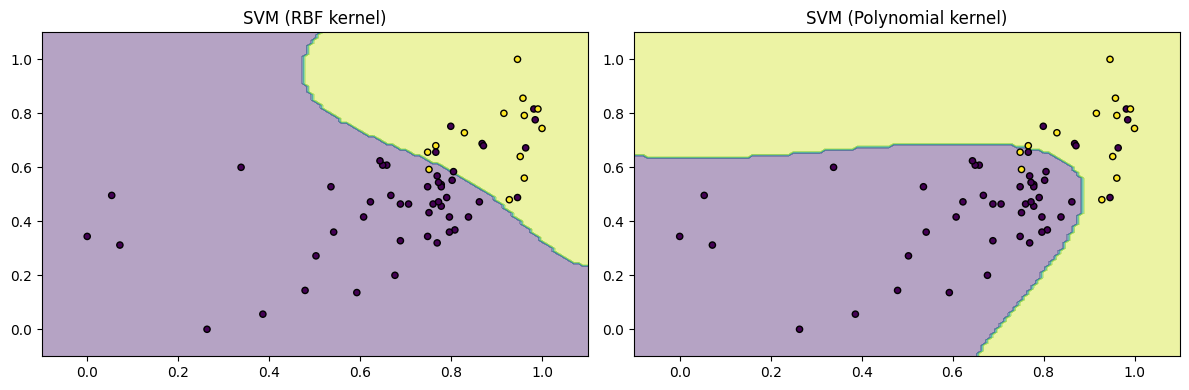

In [30]:
from sklearn.svm import SVC

# SVM with RBF kernel
clf_rbf = SVC(kernel='rbf', probability=True, class_weight='balanced')
clf_rbf.fit(df_X_norm, df_y.values.ravel())

# SVM with Polynomial kernel
clf_poly = SVC(kernel='poly', degree=3, probability=True, class_weight='balanced')
clf_poly.fit(df_X_norm, df_y.values.ravel())

x_min, x_max = df_X_norm[:, 0].min() - 0.1, df_X_norm[:, 0].max() + 0.1
y_min, y_max = df_X_norm[:, 1].min() - 0.1, df_X_norm[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(1, 2, figsize=(12, 4))

for idx, clf, name in zip(range(2),
                          [clf_rbf, clf_poly],
                          ['SVM (RBF kernel)', 'SVM (Polynomial kernel)']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(df_X_norm[:, 0], df_X_norm[:, 1], c=df_y.values.ravel(),
                       s=20, edgecolor='k')
    axarr[idx].set_title(name)

plt.tight_layout()
plt.show()


**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

### **QUESTION 7 – Réponse**

We tested two SVM kernels:
- **RBF (Radial Basis Function)**: nonlinear, smooth boundary
- **Polynomial** (degree 3): nonlinear, but less flexible and more geometric

#### **What do we observe?**
- The **RBF kernel** creates a curved and natural decision boundary. It adapts to the real distribution of the points, especially near the class overlap.
- The **Polynomial kernel** produces a more rigid, angular separation that fails to capture the true complexity of the class distribution.

#### **Conclusion:**
The **RBF kernel** is the best suited for this dataset because:
- The data is **not linearly separable**
- RBF creates a **flexible boundary** that generalizes well
- Visually, it captures more class 1 (Developed) points correctly without overfitting

➡️ We recommend using the **RBF kernel** for better performance and smoother decision boundaries.


**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

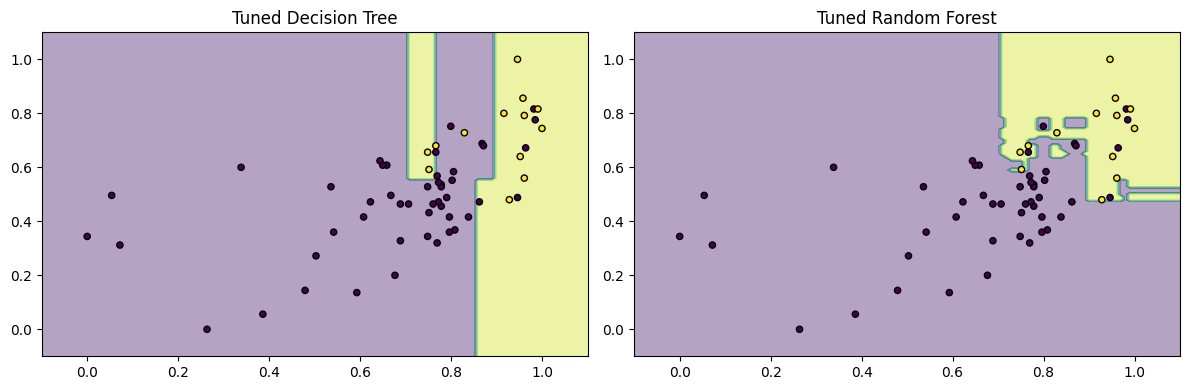

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tuned hyperparameters
clf_tree_tuned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, class_weight='balanced')
clf_forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=2, class_weight='balanced')

# Train
clf_tree_tuned.fit(df_X_norm, df_y.values.ravel())
clf_forest_tuned.fit(df_X_norm, df_y.values.ravel())

##plot

x_min, x_max = df_X_norm[:, 0].min() - 0.1, df_X_norm[:, 0].max() + 0.1
y_min, y_max = df_X_norm[:, 1].min() - 0.1, df_X_norm[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(1, 2, figsize=(12, 4))

for idx, clf, name in zip(range(2),
                          [clf_tree_tuned, clf_forest_tuned],
                          ['Tuned Decision Tree', 'Tuned Random Forest']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(df_X_norm[:, 0], df_X_norm[:, 1], c=df_y.values.ravel(),
                       s=20, edgecolor='k')
    axarr[idx].set_title(name)

plt.tight_layout()
plt.show()



## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
import pandas as pd

# 1. Filter 2000 and 2012 data with correct column names
X_cols = ["Total_expenditure", "Schooling"]
df_2000 = df[df["Year"] == 2000]
df_2012 = df[df["Year"] == 2012]

X_2000 = df_2000[X_cols]
X_2012 = df_2012[X_cols]

y_2012 = df_2012[["Status"]].replace(["Developing", "Developed"], [0, 1])

# 2. Normalize 2012 using 2000's min and max
X_2012_norm = (X_2012 - X_2000.min()) / (X_2000.max() - X_2000.min())

# 3. Impute missing values with column mean
imputer = SimpleImputer(strategy="mean")
X_2012_clean = pd.DataFrame(imputer.fit_transform(X_2012_norm),
                            columns=X_cols,
                            index=X_2012_norm.index)

# 4. Predictions
y_pred_svm = clf2_bal.predict_proba(X_2012_clean)
y_pred_tree = clf3_bal.predict_proba(X_2012_clean)
y_pred_forest = clf4_bal.predict_proba(X_2012_clean)

# 5. AUC Scores
auc_svm = roc_auc_score(y_2012, y_pred_svm[:, 1])
auc_tree = roc_auc_score(y_2012, y_pred_tree[:, 1])
auc_forest = roc_auc_score(y_2012, y_pred_forest[:, 1])

# 6. Display results
print(f"SVM AUC on 2012: {auc_svm:.3f}")
print(f"Decision Tree AUC on 2012: {auc_tree:.3f}")
print(f"Random Forest AUC on 2012: {auc_forest:.3f}")


SVM AUC on 2012: 0.881
Decision Tree AUC on 2012: 0.708
Random Forest AUC on 2012: 0.892


<ipython-input-44-f1448de6973b>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_2012 = df_2012[["Status"]].replace(["Developing", "Developed"], [0, 1])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**QUESTION 8**

Are your models still relevant in the year 2012?

### ✅ QUESTION 8 — Are your models still relevant in the year 2012?

Yes, the models trained on the year 2000 data are still relevant in 2012.

The evaluation results on 2012 data are:

- **SVM (balanced)** AUC: **0.881**
- **Decision Tree (balanced)** AUC: **0.708**
- **Random Forest (balanced)** AUC: **0.892**

These scores show that the classifiers are able to generalize well on future data.  
In particular, the SVM and Random Forest classifiers maintain high AUC values, which means their predictions effectively separate the two classes.

> **Conclusion**:  
> The models still perform well in 2012, especially Random Forest, which shows the best generalization performance.
